In [57]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = "Karla"
plt.rcParams['font.family'] = "sans-serif"

In [13]:
def to_float(val):
   return float(val.replace("%", ""))/100

In [14]:
sleep = pd.read_csv("sleepdata.csv", sep = ";")
sleep = sleep.drop(columns=["Mood", "Heart rate (bpm)", "City", "Did snore", "Snore time", 
                            "Weather temperature (°F)", "Weather type", "Notes", "Window start", "Window stop"])
sleep['Start'] = pd.to_datetime(sleep['Start'])
sleep['End'] = pd.to_datetime(sleep['End'])
sleep = sleep.rename(columns={"Start": "tracking_start", "End": "tracking_end", 
                             "Sleep Quality": "quality", "Regularity": "regularity",
                             "Steps": "day_steps", "Alarm mode": "alarm", "Air Pressure (Pa)": "air_pressure",
                             "Movements per hour": "movements_per_hr", "Time in bed (seconds)": "time_total",
                             "Time asleep (seconds)": "time_asleep", "Time before sleep (seconds)": "time_presleep"})

sleep["quality"] = sleep["quality"].apply(to_float)
sleep["regularity"] = sleep["regularity"].apply(to_float)

In [15]:
sleepqual = sleep.drop(columns=["tracking_end", "regularity", "day_steps", "alarm", "air_pressure", 
                            "movements_per_hr", "time_total", "time_asleep", "time_presleep"])
sleepqual["year"] = sleepqual["tracking_start"].dt.year
sleepqual["month"] = sleepqual["tracking_start"].dt.month
sleepqual["day"] = sleepqual["tracking_start"].dt.day
sleepqual = sleepqual.drop(columns=["tracking_start"])
sleepqual['date'] = pd.to_datetime(dict(year = sleepqual.year, month = sleepqual.month, day = sleepqual.day))

In [17]:
sleepqual.to_csv("sleep_cleaned.csv")

In [18]:
seattle = pd.read_csv("seattle_cleaned.csv")
boston = pd.read_csv("boston_cleaned.csv")
sleep = pd.read_csv("sleep_cleaned.csv")

In [28]:
seattle = seattle.rename(columns={'TMIN': 'seattle_min', 'DATE': 'date'})
boston = boston.rename(columns={'TMIN': 'boston_min', 'DATE': 'date'})

In [30]:
sleep = sleep[['quality', 'date']]
seattle = seattle[['date', 'seattle_min']]
boston = boston[['date', 'boston_min']]

In [40]:
sleep_temp['date'] = pd.to_datetime(sleep_temp['date'])

In [49]:
sleep_temp = pd.merge(sleep, seattle, on = 'date')
sleep_temp = pd.merge(sleep_temp, boston, on = 'date')
sleep_temp['my_temp_1'] = sleep_temp.apply(lambda x: x['seattle_min'] if x['date'] < '2021-08-24' else x['boston_min'], axis = 1) 
sleep_temp['my_temp_2'] = sleep_temp.apply(lambda x: x['my_temp_1'] if x['date'] < '2021-12-16' else x['seattle_min'], axis = 1) 
sleep_temp['my_temp'] = sleep_temp.apply(lambda x: x['my_temp_2'] if x['date'] < '2022-01-22' else x['boston_min'], axis = 1) 
sleep_temp = sleep_temp[['quality', 'date', 'my_temp']]
sleep_temp

,quality,date,my_temp
0,0.65,2020-01-01,30.0
1,0.79,2020-01-02,26.0
2,0.75,2020-01-03,34.0
3,0.84,2020-01-04,25.0
4,0.76,2020-01-05,26.0
...,...,...,...
799,0.72,2022-06-14,64.0
800,0.78,2022-06-16,58.0
801,0.82,2022-06-17,67.0
802,0.79,2022-06-17,67.0


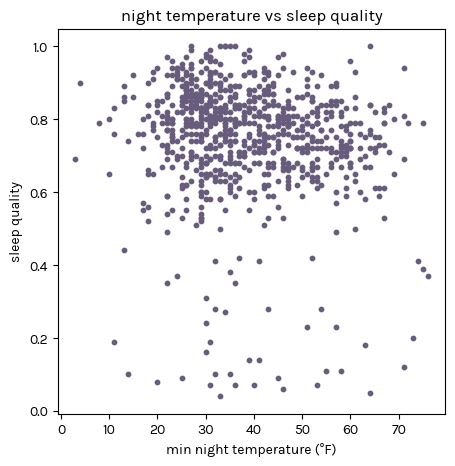

In [69]:
plt.figure(figsize=(5, 5))
plt.scatter(sleep_temp['my_temp'], sleep_temp['quality'], s = 10, color = "#685c7d")

plt.title('night temperature vs sleep quality')
plt.xlabel('min night temperature (°F)')
plt.ylabel('sleep quality')
#plt.show()

plt.savefig('sleepvs_nighttemp.png', dpi = 300, bbox_inches='tight')